In [1]:
from typing import Union, Optional, List

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import models.ssmrk2 as ssmrk
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
abbrs = ("M01", "M02", "M03", "M04", "M05", "M06", "M07")
colors = {
    "asphalt": "xkcd:grey",
    "gravel": "xkcd:vibrant purple",
}
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

dashes = {
    "rotational": ":",
    "linear": "-",
}
rotational = ("M03", "M04", "M05", "M06")


def add_legends(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure]):
    patch = lambda d, c: plt.plot([], [], ls=d, color=c)[0]

    terr_legend_labels, terr_legend_handles = colors.keys(), colors.values()
    terr_legend_handles = [patch("-", col) for col in terr_legend_handles]
    run_legend_labels, run_legend_handles = dashes.keys(), dashes.values()
    run_legend_handles = [patch(dash, "k") for dash in run_legend_handles]

    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    terrain_legend = mpl_elem.legend(
        handles=terr_legend_handles,
        labels=terr_legend_labels,
        bbox_to_anchor=(0, -0.03),
        loc="upper left",
        title="Terrain",
    )
    mpl_elem.add_artist(terrain_legend)

    run_legend = mpl_elem.legend(
        handles=run_legend_handles,
        labels=run_legend_labels,
        bbox_to_anchor=(1, -0.03),
        loc="upper right",
        title="Type of run",
    )
    mpl_elem.add_artist(run_legend)


In [3]:
dfs = {}
for abbr in abbrs:
    preprocess(abbr)
    gora_df, _ = ssmrk.ssmrk2_main(abbr);
    dfs[abbr] = gora_df


M01 : Exported merged CSV in data/runs/M01/elec/M01_2022-09-14-19-01-10-AP-LinParking01_elec_motor_data.csv
Primary topic : mcu_status
M01 : Exported merged CSV in data/runs/M01/merged/M01_2022-09-14-19-01-10-AP-LinParking01_m.csv
M01 : Exported cut CSV in data/runs/M01/merged/M01_2022-09-14-19-01-10-AP-LinParking01_mc.csv
Constant columns : 20
['/mcu/status/current_48v', '/warthog_velocity_controller/odom/position/z', '/warthog_velocity_controller/odom/orientation/x', '/warthog_velocity_controller/odom/orientation/y', '/warthog_velocity_controller/odom/orientation/roll', '/warthog_velocity_controller/odom/orientation/pitch', '/warthog_velocity_controller/odom/lin_twi/y', '/warthog_velocity_controller/odom/lin_twi/z', '/warthog_velocity_controller/odom/ang_twi/x', '/warthog_velocity_controller/odom/ang_twi/y', '/imu_and_wheel_odom/lin_twi/y', '/imu_and_wheel_odom/lin_twi/z', '/imu_and_wheel_odom/ang_twi/x', '/imu_and_wheel_odom/ang_twi/y', '/imu_and_wheel_odom/ang_twi/z', '/warthog_vel

/home/norlab/code/202206/terrain-code/models/ssmrk2.py:360: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  optimized = optimize.fmin(power_estimate_error, x0=x_sym, args=(H_sym, P_meas), full_output=True)


M06 : Exported SSMR kinematics CSV in data/runs/M06/ssmrk/M06_2022-09-12-15-16-51-GD-RotDumpCCW02_ssmrk_gora.csv
M07 : Exported merged CSV in data/runs/M07/elec/M07_2022-09-12-15-08-14-GD-LinDump_elec_motor_data.csv
Primary topic : mcu_status
M07 : Exported merged CSV in data/runs/M07/merged/M07_2022-09-12-15-08-14-GD-LinDump_m.csv
M07 : Exported cut CSV in data/runs/M07/merged/M07_2022-09-12-15-08-14-GD-LinDump_mc.csv
Constant columns : 21
['/mcu/status/current_48v', '/warthog_velocity_controller/odom/position/z', '/warthog_velocity_controller/odom/orientation/x', '/warthog_velocity_controller/odom/orientation/y', '/warthog_velocity_controller/odom/orientation/roll', '/warthog_velocity_controller/odom/orientation/pitch', '/warthog_velocity_controller/odom/lin_twi/y', '/warthog_velocity_controller/odom/lin_twi/z', '/warthog_velocity_controller/odom/ang_twi/x', '/warthog_velocity_controller/odom/ang_twi/y', '/imu_and_wheel_odom/lin_twi/y', '/imu_and_wheel_odom/lin_twi/z', '/imu_and_whee

In [4]:
figdir = u.get_figdir("summary")
ssmrkgifs = figdir / "gora"


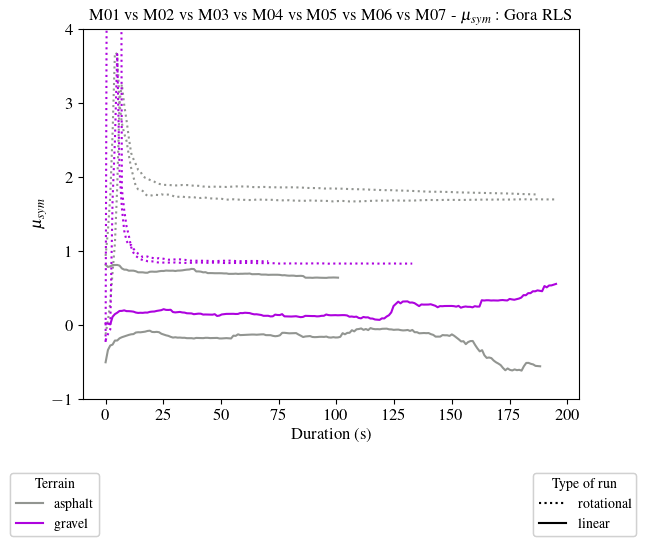

In [5]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].m_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
ax.set_ylim((-1, 4))
add_legends(fig)
ax.set_ylabel("$\mu_{sym}$", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $\mu_{{sym}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora00_m_sym.jpg", bbox_inches="tight")


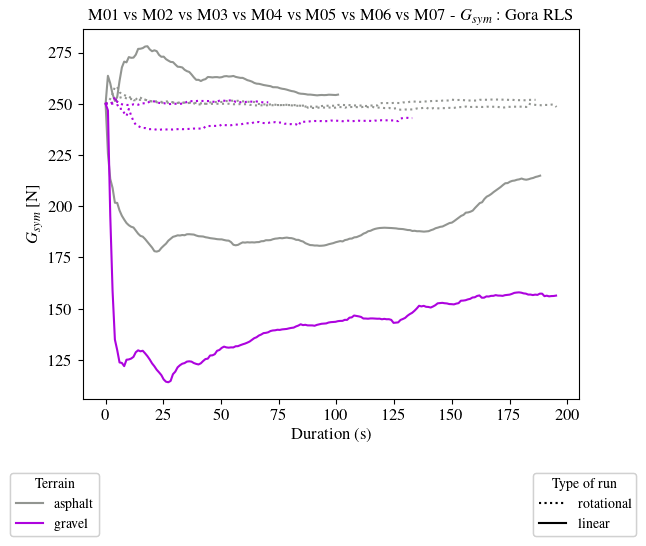

In [6]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].G_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
# ax.set_ylim((240,280))
add_legends(fig)
ax.set_ylabel("$G_{sym}$ [N]", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $G_{{sym}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora01_G_sym.jpg", bbox_inches="tight")


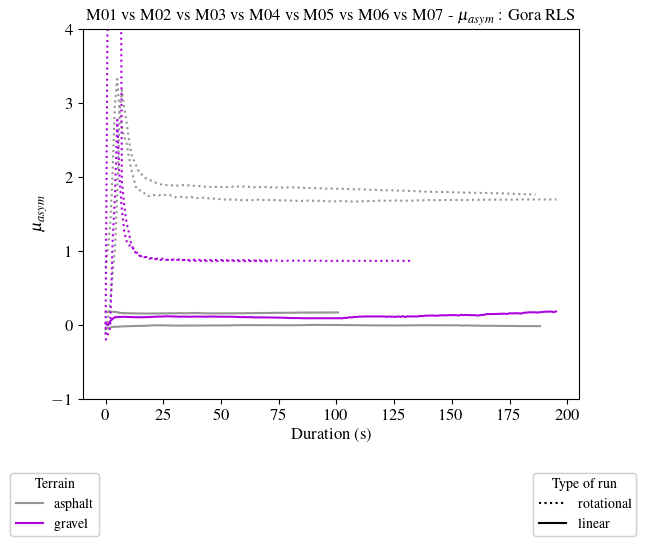

In [7]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].m_asym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
ax.set_ylim((-1, 4))
add_legends(fig)
ax.set_ylabel("$\mu_{asym}$", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $\mu_{{asym}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora02_m_asym.jpg", bbox_inches="tight")

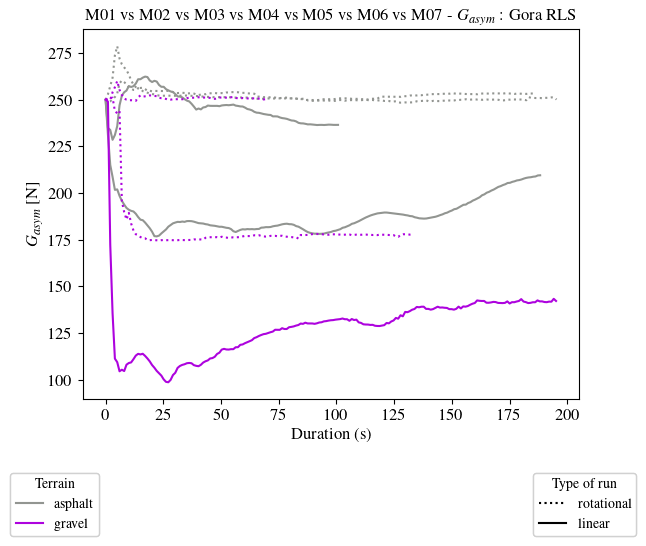

In [8]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].G_asym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
# ax.set_ylim((240,260))
add_legends(fig)
ax.set_ylabel("$G_{asym}$ [N]", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $G_{{asym}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora03_G_asym.jpg", bbox_inches="tight")


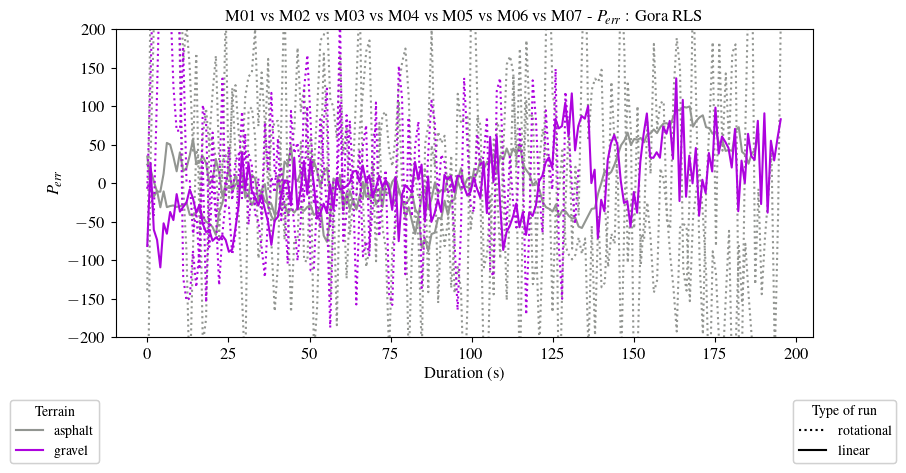

In [9]:
fig, ax = plt.subplots(figsize=(9, 4))

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].P_err_conv,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
ax.set_ylim(-200, 200)
add_legends(fig)
ax.set_ylabel("$P_{err}$", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $P_{{err}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora04_error_conv.jpg", bbox_inches="tight")

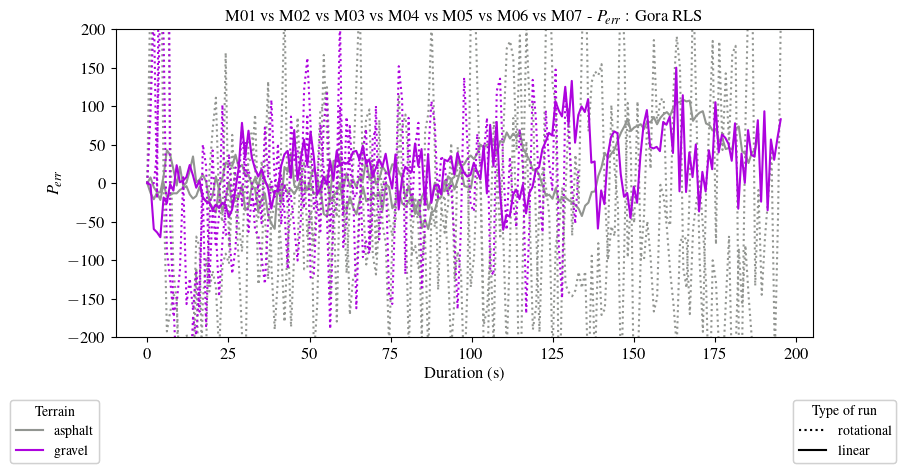

In [10]:
fig, ax = plt.subplots(figsize=(9, 4))

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].P_err_t,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
ax.set_ylim(-200, 200)
add_legends(fig)
ax.set_ylabel("$P_{err}$", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $P_{{err}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora05_error_t.jpg", bbox_inches="tight")